<a href="https://colab.research.google.com/github/aayush-sharmaa/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -** Ayush Sharma

# **Project Summary -**

Bike sharing systems have become popular in many cities around the world. These systems provide a convenient and eco-friendly transportation option for short trips. However, for bike sharing systems to be efficient and meet user demands, it's crucial to predict how many bikes will be needed at different times and locations. This project aims to build a machine learning model to predict bike sharing demand based on historical data. The main goal of this project is to create a predictive model that can accurately forecast the number of bikes needed at various stations throughout the day. By doing so, bike sharing companies can ensure that bikes are available when and where they are needed, leading to higher customer satisfaction and better resource management.

# **GitHub Link -**

https://github.com/aayush-sharmaa/Bike-Sharing-Demand-Prediction

# **Problem Statement**


Bike sharing companies need to ensure that bikes are available for users when and where they need them. However, predicting how many bikes will be needed at different times and locations can be challenging due to varying factors like weather, time of day, and holidays. If a station runs out of bikes or has too many, it can lead to user dissatisfaction and operational inefficiencies.

The problem we aim to solve is: How can we accurately predict the number of bikes that will be rented at different times and locations to ensure bikes are available when needed and reduce wastage?

By developing a machine learning model to predict bike demand, we can help bike sharing companies manage their resources better, leading to a more efficient and user-friendly service.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [20]:
# Import Libraries
# Importing NumPy for numerical operations
import numpy as np

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing Matplotlib for data visualization
import matplotlib.pyplot as plt

# Importing Seaborn for advanced data visualization
import seaborn as sns

# Importing train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing LinearRegression for building linear regression models
from sklearn.linear_model import LinearRegression

# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Importing OneHotEncoder for encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# Importing evaluation metrics for model performance assessment
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Dataset Loading

In [21]:
# Load Dataset
df = pd.read_excel('/content/Bike Data.xlsx')

### Dataset First View

In [22]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [23]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [24]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Duplicate Values

In [25]:
# Dataset Duplicate Value Count
duplicate = df.duplicated()
duplicate.value_counts()

False    8760
Name: count, dtype: int64

There is not any duplicate values present in our dataset.

#### Missing Values/Null Values

In [26]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

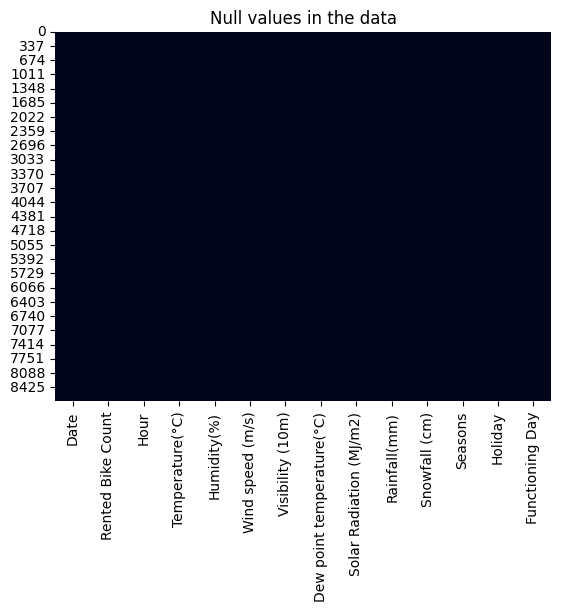

In [27]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar = False)
plt.title('Null values in the data')
plt.show()

### What did you know about your dataset?

1. **Shape**: Your dataset has 8760 rows and 14 columns.
2. **Columns**: The dataset contains the following columns:
   - 'Date': Represents the date and time of each observation.
   - 'Rented Bike Count': Represents the number of bikes rented during each observation.
   - 'Hour': Represents the hour of the day for each observation.
   - 'Temperature(°C)': Represents the temperature in Celsius.
   - 'Humidity(%)': Represents the humidity percentage.
   - 'Wind speed (m/s)': Represents the wind speed in meters per second.
   - 'Visibility (10m)': Represents visibility in meters.
   - 'Dew point temperature(°C)': Represents the dew point temperature in Celsius.
   - 'Solar Radiation (MJ/m2)': Represents solar radiation in mega joules per square meter.
   - 'Rainfall(mm)': Represents rainfall in millimeters.
   - 'Snowfall (cm)': Represents snowfall in centimeters.
   - 'Seasons': Represents the season (e.g., Spring, Summer, Fall, Winter).
   - 'Holiday': Indicates whether it's a holiday or not.
   - 'Functioning Day': Indicates whether it's a functioning day or not.
3. **Missing Values**: There are no missing values in the dataset.
4. **Duplicate Values**: There are no duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [28]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [29]:
# Dataset Describe
df.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746


### Variables Description

**Columns**: The dataset contains the following columns:
   - 'Date': Represents the date and time of each observation.
   - 'Rented Bike Count': Represents the number of bikes rented during each observation.
   - 'Hour': Represents the hour of the day for each observation.
   - 'Temperature(°C)': Represents the temperature in Celsius.
   - 'Humidity(%)': Represents the humidity percentage.
   - 'Wind speed (m/s)': Represents the wind speed in meters per second.
   - 'Visibility (10m)': Represents visibility in meters.
   - 'Dew point temperature(°C)': Represents the dew point temperature in Celsius.
   - 'Solar Radiation (MJ/m2)': Represents solar radiation in mega joules per square meter.
   - 'Rainfall(mm)': Represents rainfall in millimeters.
   - 'Snowfall (cm)': Represents snowfall in centimeters.
   - 'Seasons': Represents the season (e.g., Spring, Summer, Fall, Winter).
   - 'Holiday': Indicates whether it's a holiday or not.
   - 'Functioning Day': Indicates whether it's a functioning day or not.

### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for Date:
<DatetimeArray>
['2017-12-01 00:00:00', '2017-12-02 00:00:00', '2017-12-03 00:00:00',
 '2017-12-04 00:00:00', '2017-12-05 00:00:00', '2017-12-06 00:00:00',
 '2017-12-07 00:00:00', '2017-12-08 00:00:00', '2017-12-09 00:00:00',
 '2017-12-10 00:00:00',
 ...
 '2018-11-21 00:00:00', '2018-11-22 00:00:00', '2018-11-23 00:00:00',
 '2018-11-24 00:00:00', '2018-11-25 00:00:00', '2018-11-26 00:00:00',
 '2018-11-27 00:00:00', '2018-11-28 00:00:00', '2018-11-29 00:00:00',
 '2018-11-30 00:00:00']
Length: 365, dtype: datetime64[ns]

Unique values for Rented Bike Count:
[ 254  204  173 ... 1538  804  595]

Unique values for Hour:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]

Unique values for Temperature(°C):
[ -5.2  -5.5  -6.   -6.2  -6.4  -6.6  -7.4  -7.6  -6.5  -3.5  -0.5   1.7
   2.4   3.    2.1   1.2   0.8   0.6   0.   -0.3  -0.8  -0.9  -1.3  -1.8
  -2.2  -2.9  -3.8  -4.   -4.3  -4.4  -4.2  -0.4   1.9   4.3   6.    7.3
   7.6   6.4   5.5   5. 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [36]:
# Write your code to make your dataset analysis ready.
df['Date'] = pd.to_datetime(df['Date']) # converting the Date column to datetime column
df['month'] = df['Date'].dt.month # making a new month column from the Date column
df['day_of_week'] = df['Date'].dt.dayofweek # making a new column day_of_week from the Date column
df['is_weekend'] = df['day_of_week'].apply(lambda x:1 if x == 5 or x ==6 else 0) # making a new is_weekend column from the day_of_week column

In [39]:
# Drop the day_of_week column from the dataset
df.drop('day_of_week',axis =1,inplace = True )

In [40]:
# Count the unique values of the dataset
df['is_weekend'].value_counts()

is_weekend
0    6264
1    2496
Name: count, dtype: int64

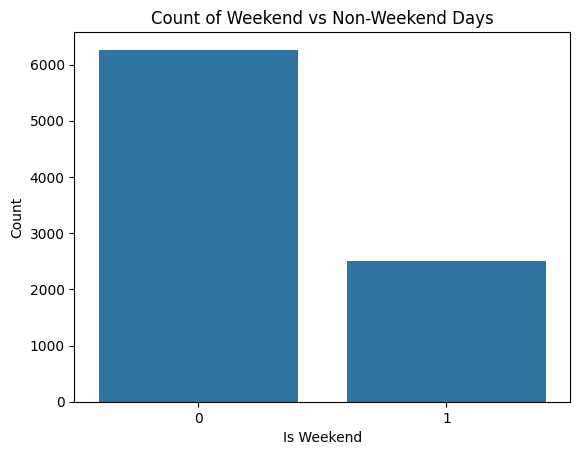

In [49]:
# Visualize the is_weekend unique values count
sns.countplot(x = 'is_weekend', data = df)
plt.title('Count of Weekend vs Non-Weekend Days')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.show()


In [52]:
# Change the column name
df = df.rename(columns = {
    'Temperature(°C)': 'Temperature',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind_speed',
    'Visibility (10m)': 'Visibility',
    'Dew point temperature(°C)': 'Dew_point_temperature',
    'Solar Radiation (MJ/m2)': 'Solar_Radiation',
    'Rainfall(mm)': 'Rainfall',
    'Snowfall (cm)': 'Snowfall',
})

### What all manipulations have you done and insights you found?



*   Firstly i make some new columns Month and Is_weekend and drop the day of week column because it is not so usefull for our analysis and found that there is 2496 weekend days and 6264 weekdays present in our dataset.

*   Change the name of some columns like Temperature(°C) to Temprature, Humidity(%) to Humidity, Wind speed (m/s) to Wind speed, Visibility (10m) to Visibility, Dew point temperature(°C) to Dew point temperature, Solar Radiation (MJ/m2) to Solar Radiation, Rainfall(mm) to Rainfall and Snowfall (cm) to Snowfall


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Q. Top highest demand months in a year.

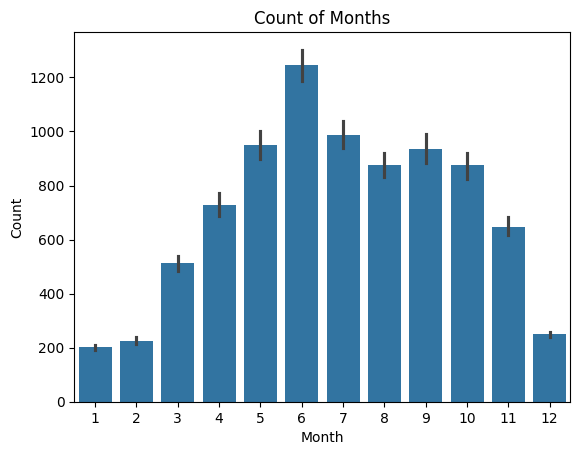

In [58]:
# Chart - 1 visualization code
sns.barplot(x = 'month',y = 'Rented Bike Count', data = df)
plt.title('Count of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I just want to know that in which month the demand is very high so count plot is the best to  visualize the count of demand in a month.

##### 2. What is/are the insight(s) found from the chart?

There is a good relationship between month and number of bike rent so in the month of June there is a high number of bike rented then the other month and Then may and July is in the second place so we can say that in the warm season there is a height demand of bike rent than the other season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positivie Impact :- In June, May, and July, bike rentals go up, leading to more revenue. Businesses can plan for this by having more bikes and staff ready.

Negative Impact :- Demand drops in colder months, making it hard to cover costs. This dependency on warm weather can lead to financial instability during off-peak seasons.

#### Chart - 2

Q. What Is the effect of temperature in rented bike demand.


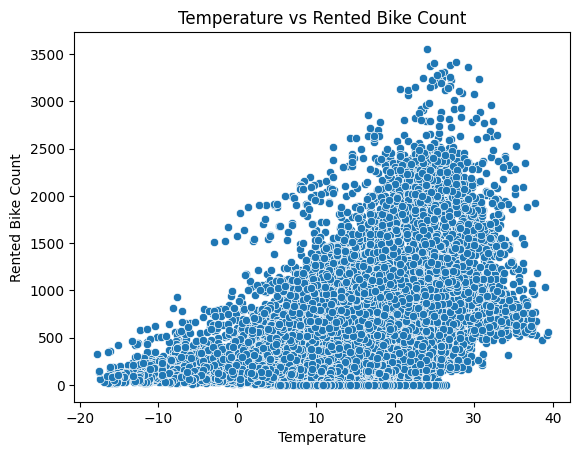

In [55]:
# Chart - 2 visualization code
sns.scatterplot(x = 'Temperature', y = 'Rented Bike Count', data = df)
plt.title('Temperature vs Rented Bike Count')
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

I just want to know that what will be the effect of temperature in rent bike, so for this the scatter plot will be the best visualization for display.

##### 2. What is/are the insight(s) found from the chart?

As we can see that as the temperature is increasing the demand of bike rented is also increasing so there is a linear relationship between temperature and bike rent demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact :- As temperatures rise, the demand for bike rentals increases, leading to higher revenues for bike-sharing companies. This positive correlation allows businesses to capitalize on warm weather by promoting bike rentals more aggressively.

Negative Impact :- The dependency on temperature means that bike rental demand can drop significantly during colder months or in regions with unfavorable weather conditions. This seasonality leads to fluctuations in revenue, posing a challenge for maintaining maintaining financial stability throughout the year.

#### Chart - 3

Q. What is the hourly demand of bike rentals on weekend or weekdays ?

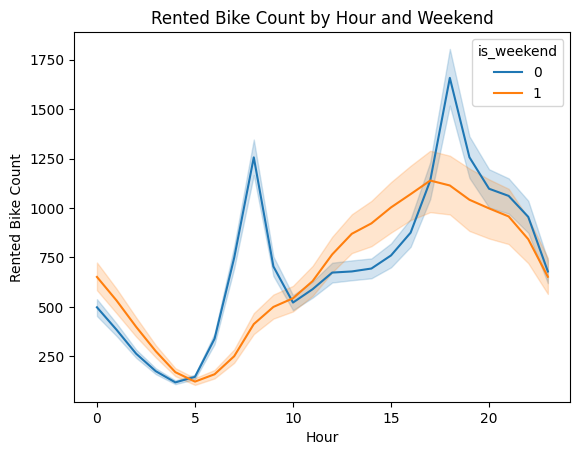

In [69]:
# Chart - 3 visualization code
sns.lineplot(x = 'Hour', y = 'Rented Bike Count', data = df, hue = 'is_weekend')
plt.title('Rented Bike Count by Hour and Weekend')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

I want to analyze the hourly rental demand so for time series analysis line plot is very suitable.

##### 2. What is/are the insight(s) found from the chart?

In weekdays the demand of rental bikes increasing between 5:00 o'clock to 10:00 o'clock and then increases slowly after 10:00 o'clock to 18 o'clock then it is declining between 20 o'clock to 5:00 o'clock and in weekends the price is slowly increases between 5:00 o'clock 17:00 o'clock and then started declining between 19 o'clock to 4:00 o'clock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact :- Increased demand during weekdays between 5:00 to 10:00 and 10:00 to 18:00 can lead to higher revenue during peak hours.

Slow increase in demand during weekends between 5:00 to 17:00 allows for consistent business throughout the day.

Negative Impact :- Decline in demand during weekdays between 20:00 to 5:00 may result in underutilization of resources during off-peak hours.

Declining demand during weekends between 19:00 to 4:00 may lead to reduced revenue during late hours and overnight.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***